<a href="https://colab.research.google.com/github/JoDeMiro/Micado-Optimizer-Test/blob/main/Auditor_for_Mylog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amik kellenek

```
2 [CPU:0]User%
4 [CPU:0]Sys%
5 [CPU:0]Wait%
9 [CPU:0]Idle%
10 [CPU:0]Total%

14 [CPU:0]User%
16 [CPU:0]Sys%
17 [CPU:0]Wait%
21 [CPU:0]Idle%
22 [CPU:0]Total%

ezekből majd -1
27 [DSK:sda]Reads
28 [DSK:sda]RMerge
29 [DSK:sda]RKBytes
30 [DSK:sda]WaitR
31 [DSK:sda]Writes
32 [DSK:sda]WMerge
33 [DSK:sda]WKbytes
34 [DSK:sda]WaitW
35 [DSK:sda]Request
36 [DSK:sda]QueLen
37 [DSK:sda]Wait
38 [DSK:sda]SvcTim
39 [DSK:sda]Util

40 [NUMA:0]Used

```


In [79]:
# Fonots

# Használathoz fel kell tölteni a mylog.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [2]:
df = pd.read_csv('mylog.log', sep=' ', header=1)

In [3]:
df.head()

,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutTimeExcds,[TCPD]OutParmProbs,[TCPD]OutSrcQuenchs,[TCPD]OutRedirects,[TCPD]OutEchos,[TCPD]OutEchoReps,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps
0,20220413,15:56:40,4,0,4,0,0,1,0,91,...,0,0,0,0,0,0,0,0,0,0
1,20220413,15:56:41,5,0,9,0,0,0,0,86,...,0,0,0,0,0,0,0,0,0,0
2,20220413,15:56:42,7,0,8,0,0,0,0,85,...,0,0,0,0,0,0,0,0,0,0
3,20220413,15:56:43,1,0,0,0,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0
4,20220413,15:56:44,0,0,0,1,0,0,0,99,...,0,0,0,0,0,0,0,0,0,0


In [68]:
ndf = df.copy()
ndf['#Date'] = pd.to_datetime(df['#Date'], format='%Y%m%d')
ndf['Time'] = pd.to_datetime(ndf['Time'], format='%H:%M:%S').dt.time

# Filter data between two dates
# -----------------------------
_begin_date = '2022-04-14'
_end_date   = '2022-04-15'
_begin_hour = 10
_begin_min  = 00
_end_hour   = 10
_end_min    = 23

ndf = ndf.query("date >= '" + _begin_date + "' and date <= '" + _end_date + "'")
# ndf = ndf.query("date >= '2022-04-14' and date <= '2022-04-15'")

ndf = ndf.loc[ndf['Time'] > time(_begin_hour,_begin_min)]
ndf = ndf.loc[ndf['Time'] < time(_end_hour,_end_min)]
# ndf = ndf.loc[ndf['Time'] > time(9,00)]

print(df.info())
ndf.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76547 entries, 0 to 76546
Columns: 119 entries, #Date to ido
dtypes: datetime64[ns](2), float64(1), int64(114), object(2)
memory usage: 69.5+ MB
None


,#Date,Time,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,...,[TCPD]OutSrcQuenchs,[TCPD]OutRedirects,[TCPD]OutEchos,[TCPD]OutEchoReps,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps,date,ido
65001,2022-04-14,10:00:01,5,0,2,0,0,0,0,93,...,0,0,0,0,0,0,0,0,2022-04-14,1900-01-01 10:00:01
65002,2022-04-14,10:00:02,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,2022-04-14,1900-01-01 10:00:02
65003,2022-04-14,10:00:03,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,2022-04-14,1900-01-01 10:00:03


In [61]:
ndf.columns

Index(['#Date', 'Time', '[CPU:0]User%', '[CPU:0]Nice%', '[CPU:0]Sys%',
       '[CPU:0]Wait%', '[CPU:0]Irq%', '[CPU:0]Soft%', '[CPU:0]Steal%',
       '[CPU:0]Idle%',
       ...
       '[TCPD]OutSrcQuenchs', '[TCPD]OutRedirects', '[TCPD]OutEchos',
       '[TCPD]OutEchoReps', '[TCPD]OutTimestamps', '[TCPD]OutTimestampReps',
       '[TCPD]OutAddrMasks', '[TCPD]OutAddrMaskReps', 'date', 'ido'],
      dtype='object', length=119)

In [63]:
ndf.describe()

,[CPU:0]User%,[CPU:0]Nice%,[CPU:0]Sys%,[CPU:0]Wait%,[CPU:0]Irq%,[CPU:0]Soft%,[CPU:0]Steal%,[CPU:0]Idle%,[CPU:0]Totl%,[CPU:0]Guest%,...,[TCPD]OutTimeExcds,[TCPD]OutParmProbs,[TCPD]OutSrcQuenchs,[TCPD]OutRedirects,[TCPD]OutEchos,[TCPD]OutEchoReps,[TCPD]OutTimestamps,[TCPD]OutTimestampReps,[TCPD]OutAddrMasks,[TCPD]OutAddrMaskReps
count,1379.000000,1379.0,1379.000000,1379.000000,1379.0,1379.000000,1379.000000,1379.000000,1379.000000,1379.0,...,1379.0,1379.0,1379.0,1379.0,1379.0,1379.0,1379.0,1379.0,1379.0,1379.0
mean,3.676577,0.0,0.917331,0.206672,0.0,0.042059,0.000725,95.150834,4.639594,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,10.647395,0.0,3.436399,1.117904,0.0,0.231046,0.026929,11.583815,11.423306,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,31.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,98.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,100.000000,2.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,69.000000,0.0,42.000000,18.000000,0.0,3.000000,1.000000,100.000000,69.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


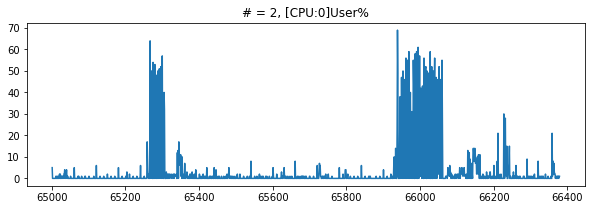

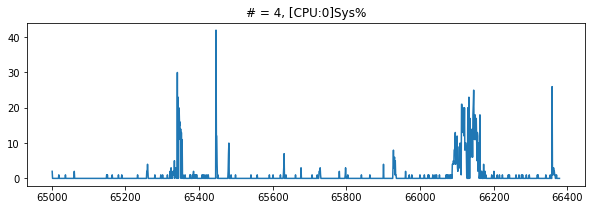

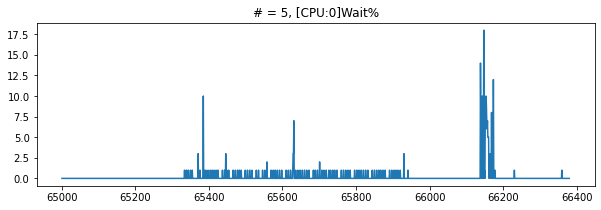

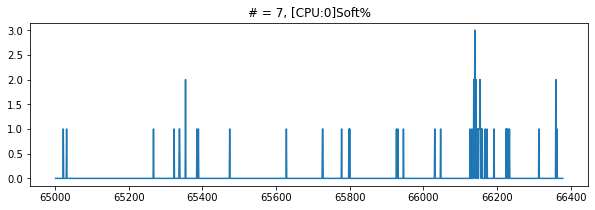

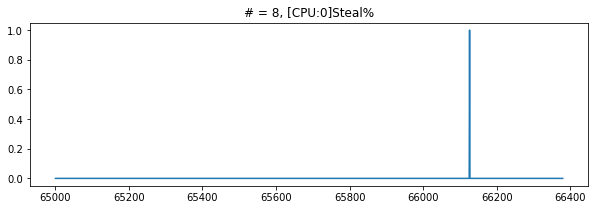

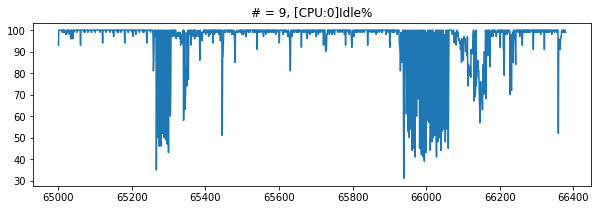

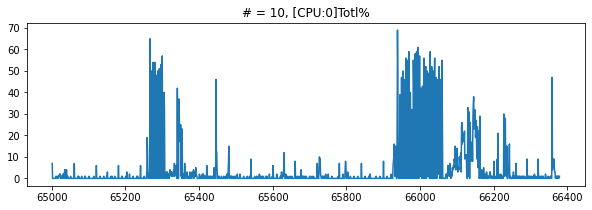

In [92]:
# CPU

# CPU-val vigyázni kell annyiszor csinálja meg ezeket a metrikákat ahány
# VCPU van, tehát ha a mögötte lévő instance 2 VCPU-t használ akkor kétszer
# -------------------------------------------------------------------------
# Ez egy potenciális hiba lehetőség,
# Mert ha olyan VM-et indítok ahol több VCPU is van, vagy nem pont két
# VCPU van akkor ezen itt nagyon el lehet majd csúszni.
# -------------------------------------------------------------------------

# 2 - User
# 3 - Nice
# 4 - Sys
# 5 - Wait
# 10 - Total

var_names = ndf.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(2, 14):
  if(ndf[var_names[i]].describe()[2] > 0.0):
    # dates = matplotlib.dates.date2num(ndf['#Date'])
    # plt.plot(dates, ndf[var_names[i]])
    plt.figure(figsize=(10, 3))
    plt.plot(ndf[var_names[i]])
    plt.title('# = ' + str(i) + ', ' + var_names[i])
    plt.show()

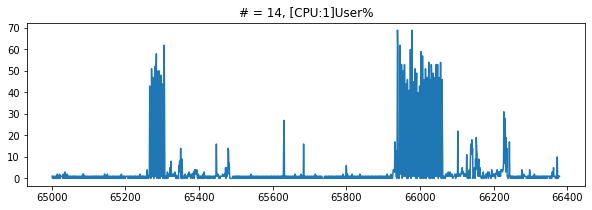

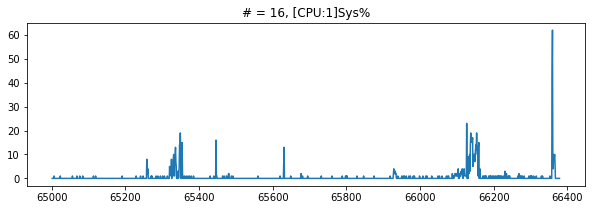

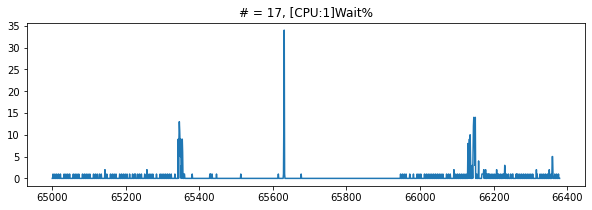

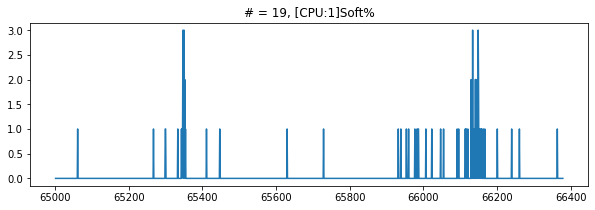

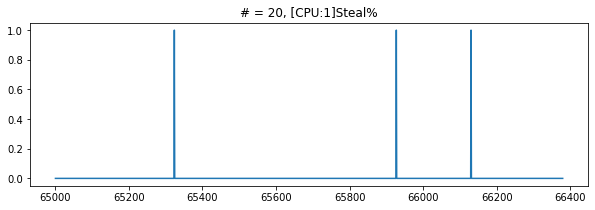

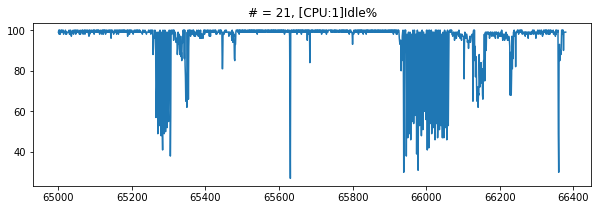

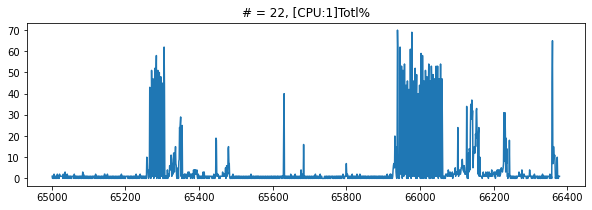

In [93]:
# CPU - 2

# 14 - User
# 15 - Nice
# 16 - Sys
# 17 - Wait
# 22 - Total

var_names = ndf.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(14, 26):
  if(ndf[var_names[i]].describe()[2] > 0.0):
    plt.figure(figsize=(10, 3))
    plt.plot(ndf[var_names[i]])
    plt.title('# = ' + str(i) + ', ' + var_names[i])
    plt.show()

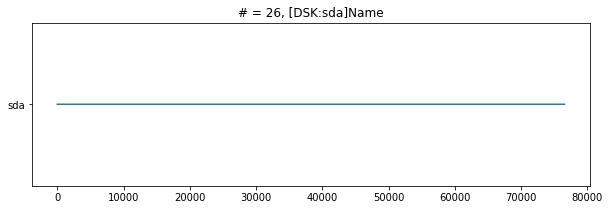

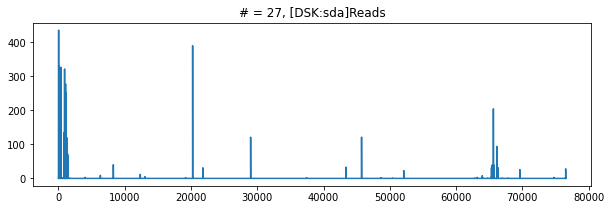

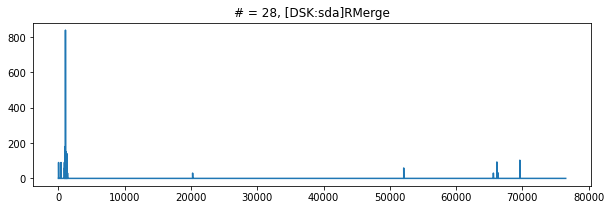

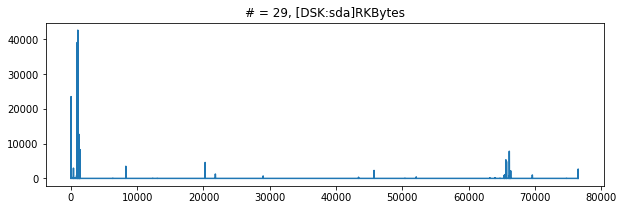

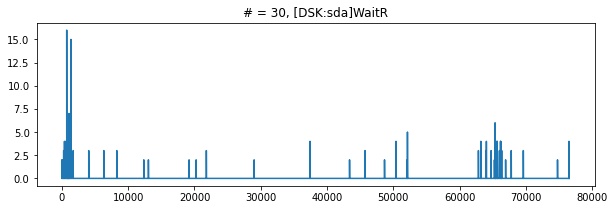

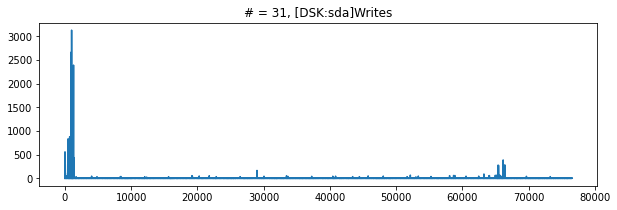

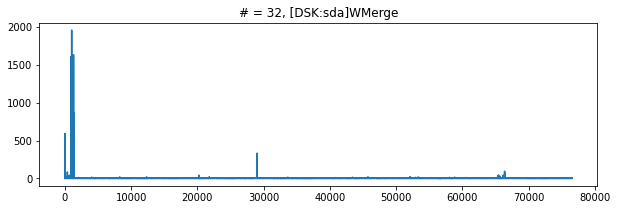

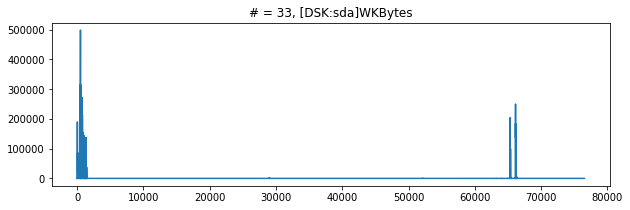

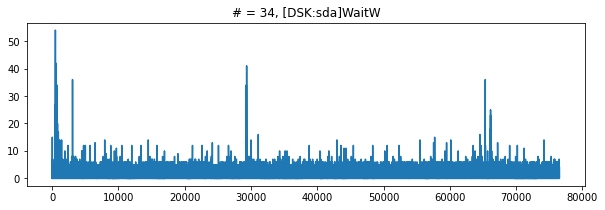

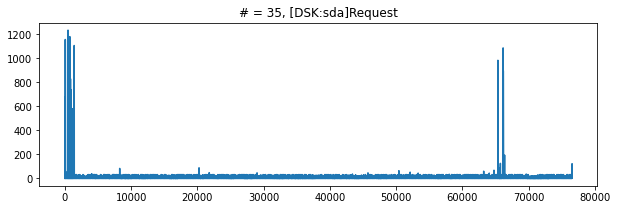

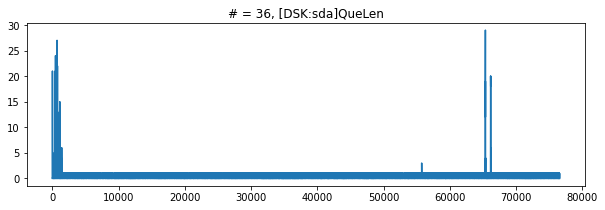

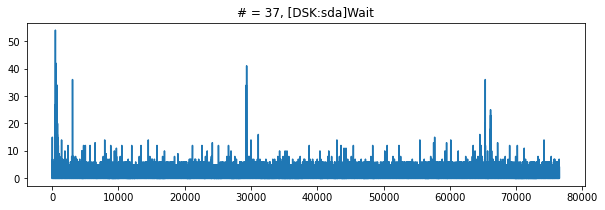

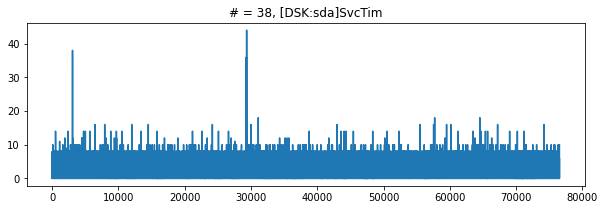

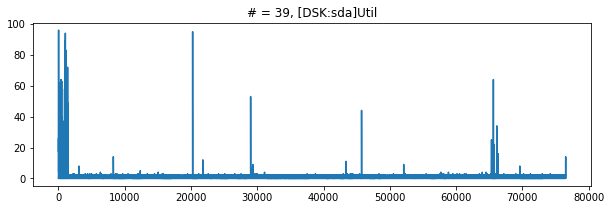

In [94]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# DSK

# 26 - name -> String -> ki fog esni
# 27 - Reads
# 29 - RKBytes
# 30 - WaitR
# 31 - Writes
# 32 - WMerge
# 33 - WKBytes
# 34 - WaitW
# 35 - Request
# 36 - QueLen
# 37 - Wait
# 38
# 39 - DskUtil -> ez tünik jó aggregátornak - 0-100

var_names = df.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(26, 40):
  plt.figure(figsize=(10, 3))
  plt.plot(df[var_names[i]])
  plt.title('# = ' + str(i) + ', ' + var_names[i])
  plt.show()

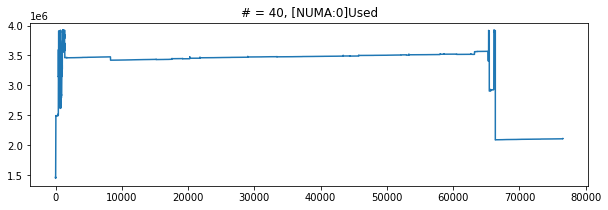

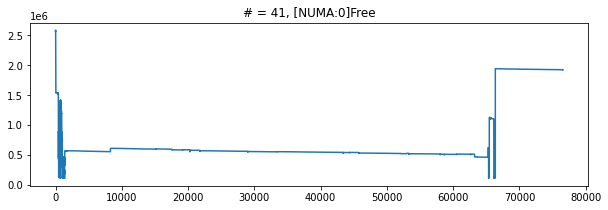

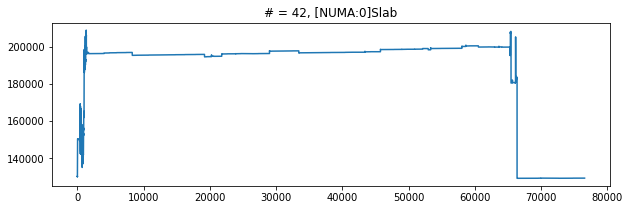

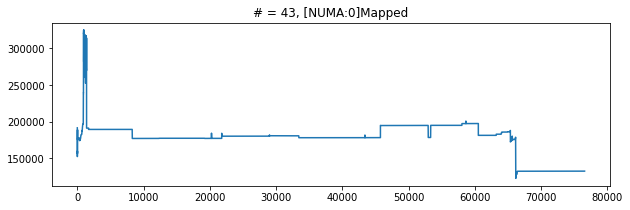

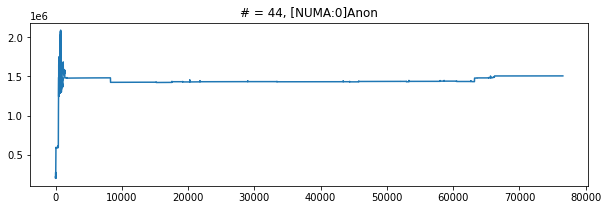

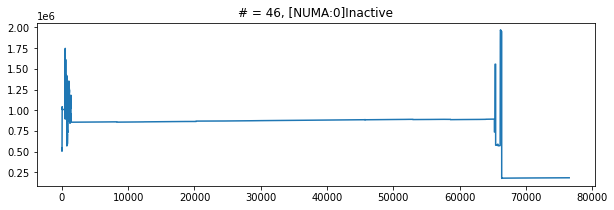

In [95]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# NUMA - Jó kérdés, hogy ez mi érdekes a Grafikonja

# ----------------> van itt néhány változó jó lenne tudni, hogy tudnám
# ----------------> átalakítani őket %-os formába
#-----------------> Ha fix az inicializált max akkor át tudom alakítani
# 40 - Used
# 41 - Free
# 42 - Slab
# 43 - Mapped
# 44 - Anon
# 45 - 48 -> constans


var_names = df.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(40, 48):
  if(ndf[var_names[i]].describe()[2] > 0.0):
    plt.figure(figsize=(10, 3))
    plt.plot(df[var_names[i]])
    plt.title('# = ' + str(i) + ', ' + var_names[i])
    plt.show()

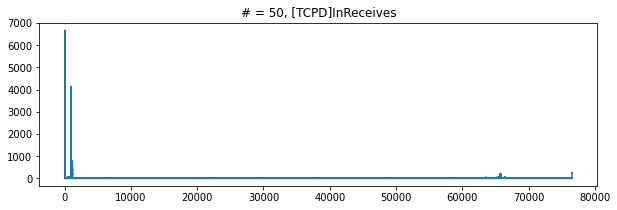

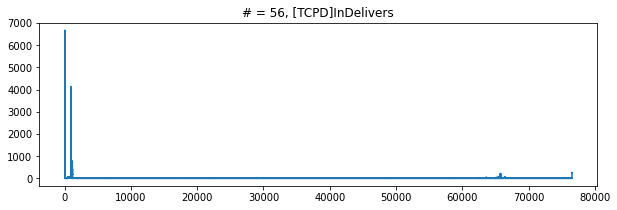

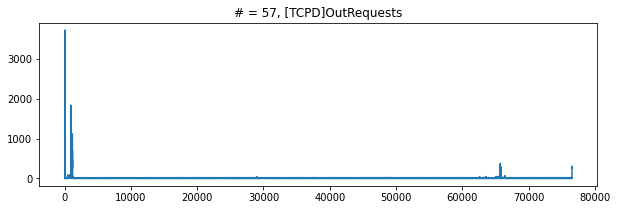

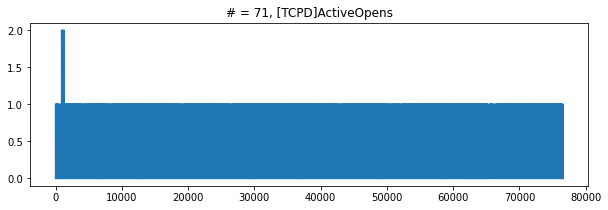

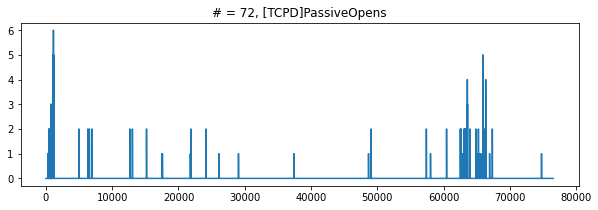

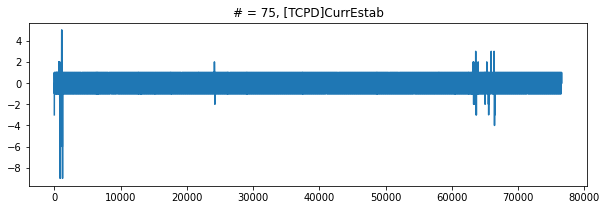

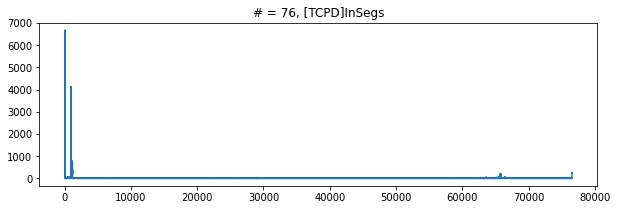

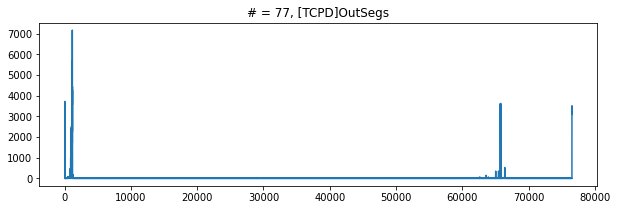

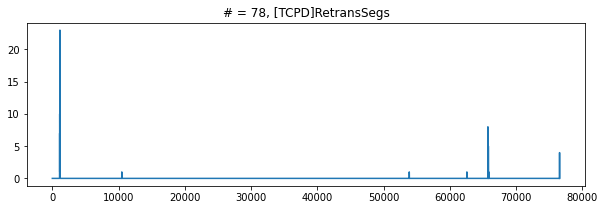

In [96]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# TCPD

# ----------------> van itt néhány változó jó lenne tudni, hogy tudnám
# ----------------> átalakítani őket %-os formába
#-----------------> Ha fix az inicializált max akkor át tudom alakítani
# 48 -> const
# 49 -> const
# 50 -> InReceives
# 51 - 55 -> const
# 56 - InDelivers
# 57 - OutRequests
# 70, 71, 72
#
# Vannak még érdekesek, valahogy az a bajom, hogy ezek csak a végén lettek
# vettek fel magas értéket
# Másik bajom, hogy ha ezek menet közben ilyen brutálisan magas érték
# felvételére képesek akkor el tudják majd vinnia a korábban 0-1 közé
# skálázott értékeket és az egész Neurális hálót.


var_names = df.columns

# for i in range(len(var_names)):
# i = 0 = #Date
# i = 1 = Time
for i in range(48, 80):
  if(ndf[var_names[i]].describe()[2] > 0.0):
    plt.figure(figsize=(10, 3))
    plt.plot(df[var_names[i]])
    plt.title('# = ' + str(i) + ', ' + var_names[i])
    plt.show()

In [14]:
# -------------------------------------------------------------------------
# Vigyázni kell a számozással mert a Linux Scriptben majd ki fognak esni
# olyan változók amelyek String-ek
# Itt is van egy ilyen ami majd ki fog esni és emiatt elcsúszik a számozás
# -------------------------------------------------------------------------

# TCPD

# 72 fölött már csak TCPD van de használhatatlanok ezek az értékek,
# úgyhogy a későbbiekben ezekkel már nem foglalkozunk

# ------------------------------------------------------------------------


